# ***Title***: Project 4 - *Artificial Neural Network for Email Spam data*
## ***Author***: Ian R. Stewart
## ***Course***: COSC528 : Fall 2018

In [16]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

> #### **IMPORTING DATA**

In [29]:
inPath = '/Users/i6o/Research/COSC 528/Project 4/'
features = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','spam class']
df = pd.read_csv(inPath+'spambase.data',names=features)

In [30]:
df.head(1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61,278,1


## 1) Data Exploration

In [31]:
print 'dataframe shape:\t(%i,%i)'%(df.shape[0],df.shape[1])
np.round(df.describe(),2)

dataframe shape:	(4601,58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam class
count,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,...,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00,4601.00
mean,0.10,0.21,0.28,0.07,0.31,0.10,0.11,0.11,0.09,0.24,...,0.04,0.14,0.02,0.27,0.08,0.04,5.19,52.17,283.29,0.39
std,0.31,1.29,0.50,1.40,0.67,0.27,0.39,0.40,0.28,0.64,...,0.24,0.27,0.11,0.82,0.25,0.43,31.73,194.89,606.35,0.49
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.59,6.00,35.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,2.28,15.00,95.00,0.00
75%,0.00,0.00,0.42,0.00,0.38,0.00,0.00,0.00,0.00,0.16,...,0.00,0.19,0.00,0.32,0.05,0.00,3.71,43.00,266.00,1.00
max,4.54,14.28,5.10,42.81,10.00,5.88,7.27,11.11,5.26,18.18,...,4.38,9.75,4.08,32.48,6.00,19.83,1102.50,9989.00,15841.00,1.00


> **Checking for empty arrays in matrix.**

In [32]:
# Iterating through df, searching for .isnull().any()
count = 0; indexes = []
for i in df.isnull().any():
    if i == True:
        indexes.append(count)
    count+=1
if len(indexes)>0:
    print 'FEATURES WITH MISSING DATA: %s'%df.columns.values[indexes]
else:
    print 'NO MISSING DATA IN DATAFRAME.'

NO MISSING DATA IN DATAFRAME.


> **No empty data entries in columns. Now, let's examine the data types for each data feature (column)**

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

>**All features are either float64 or int64, which is ideal as an object return would require further investigation into the data feature to track down why Python is reading the column as a non-float or -int.**

> **After initial pruning of the data, I observed an odd behaviour where the majority of the data entries examined (at random) contained a 1.0 spam classification indicating that the email was, in fact, spam. I want to plot the data to look if all the data are in fact spam.**

Text(0.5,0,'Entry Index in Dataframe')

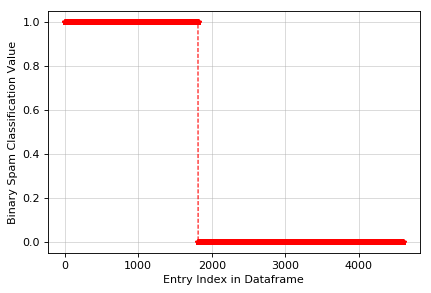

In [43]:
fig,ax = plt.subplots(dpi=80)
ax.plot(df['spam class'].values,'r*--',linewidth=1,markersize=5)
ax.grid(alpha=0.5)
ax.set_ylabel('Binary Spam Classification Value')
ax.set_xlabel('Entry Index in Dataframe')

> **My hypothesis failed, where all data entries are assigned to one class (spam or non-spam). Let's count the spam classifications.**

In [70]:
print '[No. of Spam , No. of non-Spam]\t:  [%i , %i]'%(list(df['spam class']).count(0),list(df['spam class']).count(1))

[No. of Spam , No. of non-Spam]	:  [2788 , 1813]


> **This shows that ~40% (1813/4601) of the data are classified as SPAM with the remaining ~60% (2788/4601) being non-SPAM. Another observation is that the classifications are actually grouped together, where the SPAM classifications are the FIRST 1813 entries and the latter portion of the dataframe are ALL non-SPAM classifications. This is an interesting finding, as a small training-test split for a cross-validation study can potentially cause classification errors if the an sufficient amount of each group is not represented in the training set.**

## 2) Data Analysis

Creating training-test split function for cross-validation study later.

In [71]:
def test_split(data_x,data_y,n):
    '''
    :param data_x : {array} feature data
    :param data_y : {array} classificatin data
    :param n      : {int}   percentage of split in training
    '''
    data_x = np.asarray(data_x)
    length_test = int(round(len(data_x)*(n/100.)))
    # Create random integers between two numbers with no repeats
    train_list = random.sample(range(0,len(data_x)), length_test)
    train_list.sort()
    test_list = np.arange(0,len(data_x))
    test_list = np.delete(test_list,train_list)
    data_y = np.array(data_y)
    x_train,y_train = np.array(data_x[train_list]),np.array(data_y[train_list])
    x_test,y_test   = np.array(data_x[test_list]),np.array(data_y[test_list])
    
    return (x_train,x_test,y_train,y_test,train_list,list(test_list))

In [72]:
y_data = np.array(df.iloc[:,-1])
x_data = np.array(df.iloc[:,0:-1])
print 'CHECK: Original data shape of (%i,%i) and splits shapes:\n\tx_data:\t(%i,%i)\n\ty_data:\t(%i,1)'\
    %(df.shape[0],df.shape[1],x_data.shape[0],x_data.shape[1],y_data.shape[0])

CHECK: Original data shape of (4601,58) and splits shapes:
	x_data:	(4601,57)
	y_data:	(4601,1)
